In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.Y[i]


class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.w = nn.parameter.Parameter(torch.rand([1]))
        self.b = nn.parameter.Parameter(torch.rand([1]))

    def forward(self, x):
        y_pred = self.w * x + self.b
        return y_pred

In [3]:
X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
Y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

In [4]:
dataset = CustomDataset(X, Y)
dataloader = DataLoader(dataset)

In [5]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [6]:
loss_list = []
for epoch in range(100):
    running_loss = 0.0
    optimizer.zero_grad()
    
    for x, y in dataloader:
        y_p = model(x)
        loss = criterion(y_p, y)
        running_loss += loss

    running_loss = running_loss / len(dataloader)
    running_loss.backward()
    optimizer.step()
    
    print("The parameters are w={:.4f}, b={:.4f} and loss={:.4f}".format(model.w.item(), model.b.item(), running_loss))
    loss_list.append(running_loss.item())

The parameters are w=4.9052, b=0.6024 and loss=27411.2305
The parameters are w=7.7199, b=0.7994 and loss=11817.5000
The parameters are w=9.5458, b=0.9285 and loss=5254.4404
The parameters are w=10.7303, b=1.0136 and loss=2492.1890
The parameters are w=11.4987, b=1.0700 and loss=1329.6117
The parameters are w=11.9971, b=1.1079 and loss=840.3016
The parameters are w=12.3203, b=1.1338 and loss=634.3544
The parameters are w=12.5299, b=1.1518 and loss=547.6682
The parameters are w=12.6658, b=1.1648 and loss=511.1765
The parameters are w=12.7539, b=1.1745 and loss=495.8100
The parameters are w=12.8109, b=1.1821 and loss=489.3349
The parameters are w=12.8479, b=1.1882 and loss=486.6024
The parameters are w=12.8717, b=1.1935 and loss=485.4447
The parameters are w=12.8871, b=1.1982 and loss=484.9497
The parameters are w=12.8970, b=1.2025 and loss=484.7336
The parameters are w=12.9034, b=1.2066 and loss=484.6353
The parameters are w=12.9074, b=1.2105 and loss=484.5861
The parameters are w=12.909

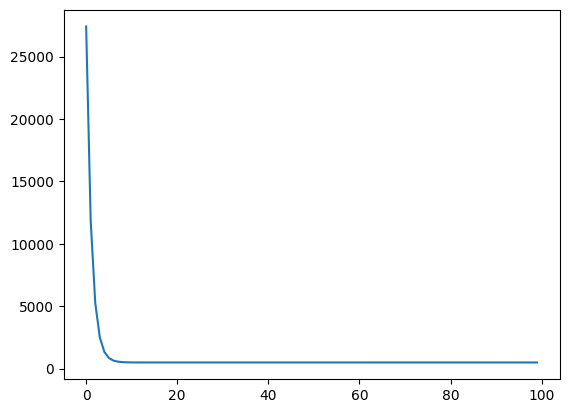

In [7]:
plt.plot(loss_list)
plt.show()